# Importing and Installing Dependencies 






In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 12618, done.
remote: Total 12618 (delta 0), reused 0 (delta 0), pack-reused 12618
Receiving objects: 100% (12618/12618), 12.49 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (8652/8652), done.


In [2]:
%cd yolov5

/content/yolov5


In [3]:
pip install -qr requirements.txt  # install

     |████████████████████████████████| 596 kB 39.4 MB/s 


In [4]:
import torch
from IPython.display import Image, clear_output  #to display images
import matplotlib.pyplot as plt
import numpy as np
import cv2 


# Loading the Pre-Trained Yolov5 Model

In [5]:
pretrained_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
INFO:yolov5:requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
requirements: PyYAML>=5.3.1 not found and is required by Y

  0%|          | 0.00/14.1M [00:00<?, ?B/s]

INFO:yolov5:

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


In [6]:
pretrained_model  #architecture of the pre-trained yolo model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# Making detections with the Pre-trained Yolo Model


In [7]:
img = 'https://images.pexels.com/photos/1031698/pexels-photo-1031698.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2'

In [8]:
detect_1 = pretrained_model(img)
detect_1.print()

image 1/1: 1500x998 4 persons, 18 cars, 1 motorcycle, 7 buss, 6 trucks, 1 tv
Speed: 305.0ms pre-process, 74.2ms inference, 48.5ms NMS per image at shape (1, 3, 640, 448)


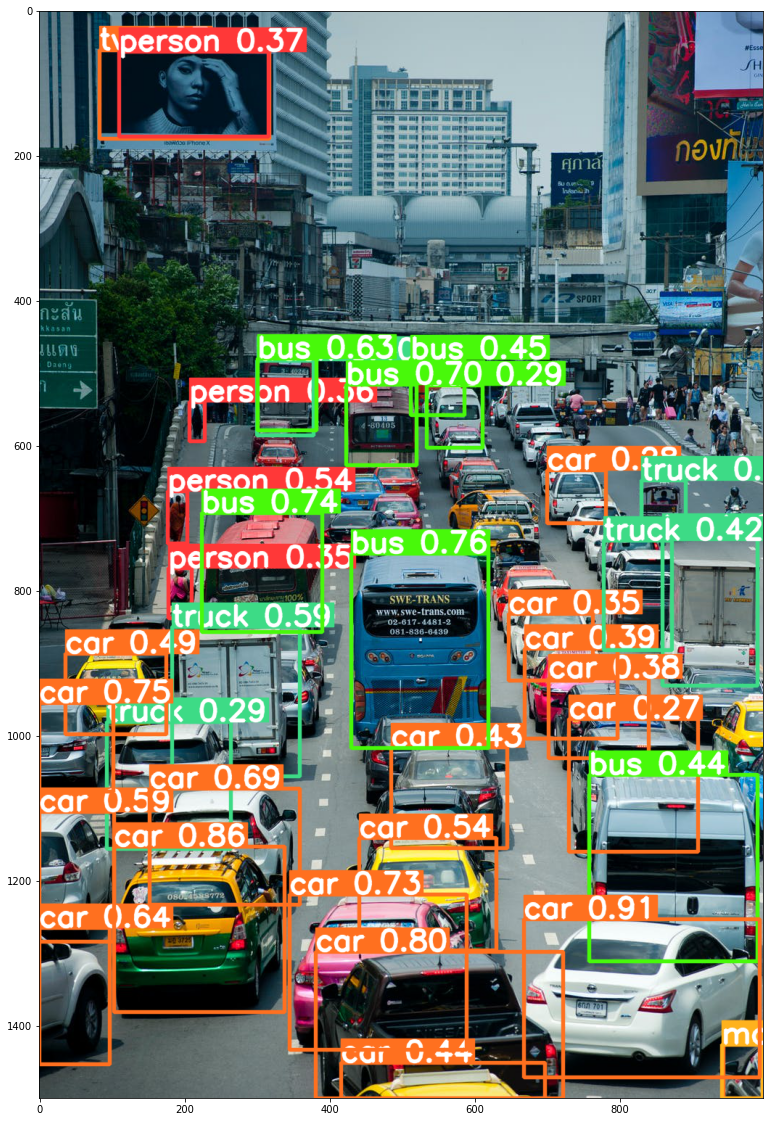

In [9]:
%matplotlib inline 
plt.rcParams["figure.figsize"] = (20,20)
plt.imshow(np.squeeze(detect_1.render()))
plt.show()

In [10]:
# results.render()

In [11]:
img = 'https://images.pexels.com/photos/7107434/pexels-photo-7107434.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2'

In [12]:
detect_2 = pretrained_model(img)
detect_2.print()

image 1/1: 1500x2250 1 person, 2 dogs
Speed: 128.2ms pre-process, 13.0ms inference, 1.2ms NMS per image at shape (1, 3, 448, 640)


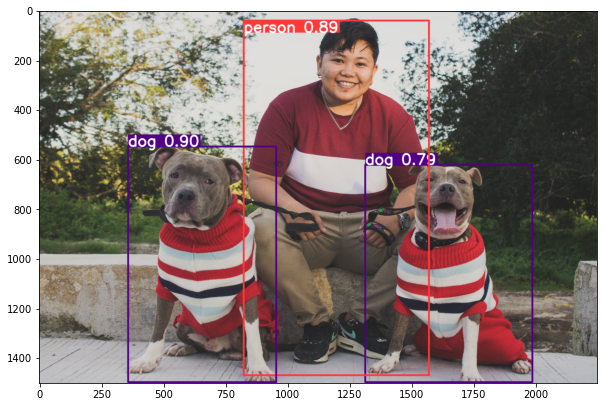

In [13]:
%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(np.squeeze(detect_2.render()))
plt.show()

# Train from Scratch using a Custom Dataset


Before training the custom model, we will have to first load the custom dataset "train_data3.zip" into the colab directory. 
Simply just drag the zip folder and make sure that the zip file stays outside the "yolov5" folder.

It will take approximately 32mins to load the "train_data3.zip" as it is 600MB in size.

I tried multiple ways to upload it on GitHub for you to make it easier while testing the code but unfortunately, GitHub doesnt support file size greater than 100MB.

In [16]:
!unzip -q ../train_data3.zip -d ../

After running the above command, just refresh the colab directory to view the unzipped "train_data3" folder. You can now delete the .zip file if you want.

Now before running the next command, make sure you drag n drop the "gesture_customdata.yaml" file from your pc to the colab directory path "yolov5/data" i.e. inside the data folder and refresh to see the changes.

This .yaml file is custom builts based on our custom dataset and it includes the path to the train and validation images along with its labels. There are total 3 classes i.e. "ok👍", "peace✌", and "dislike👎" 

In [17]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (46.5 kB/s)
Selecting previously unselected package tree.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


Looking at the structure of the custom dataset:

It consist of 271 training images with the corresponding labels in yolo format, 92 validation images with the corresponding labels in yolo format, and 26 testing images.

In [18]:
!tree ../train_data3 -L 2

../train_data3
├── images
│   ├── test
│   ├── train
│   └── val
└── labels
    ├── train
    └── val

7 directories, 0 files


In [19]:
# Training model on Hand Gesture Custom Dataset using "Adam" as an optimizer.

!python train.py --img 640 --batch 4 --epochs 10 --data gesture_customdata.yaml --weights yolov5s.pt --optimizer Adam --cache

train: weights=yolov5s.pt, cfg=, data=gesture_customdata.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-386-g2e57b84 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, 

In [20]:
# Training model on Hand Gesture Custom Dataset using "SGD" as an optimizer.

!python train.py --img 640 --batch 4 --epochs 10 --data gesture_customdata.yaml --weights yolov5s.pt --optimizer SGD --cache

train: weights=yolov5s.pt, cfg=, data=gesture_customdata.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-386-g2e57b84 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, h

In [21]:
# Training model on Hand Gesture Custom Dataset using "AdamW" as an optimizer.

!python train.py --img 640 --batch 4 --epochs 10 --data gesture_customdata.yaml --weights yolov5s.pt --optimizer AdamW --cache

train: weights=yolov5s.pt, cfg=, data=gesture_customdata.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=AdamW, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-386-g2e57b84 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7,

From the above 3 training models ['Adam', 'SGD', 'AdamW'], we can see that the first model used Adam as an optimizer and got an mAP score of 0.342, the second model used SGD as an optimizer and got a mAP score of 0.784, whereas the last model used AdamW as an optimizer and got a mAP score of 0.354.

All 3 training was performed for the same batch size of 4 and epochs 10.

Hence, lets fix the optimizer as "SGD" and now lets train the custom model for 500 epochs while keeping the batch_size as 4 because I noticed that on increasing the batch_size from 4 to 16 the mAP score slighly decreases to 0.722.

In [171]:
# Training custom model on Hand Gesture Custom Dataset using "SGD" as an optimizer for 100 epochs and batch_size = 4.

!python train.py --img 640 --batch 4 --epochs 100 --data gesture_customdata.yaml --weights yolov5s.pt --optimizer SGD --cache

train: weights=yolov5s.pt, cfg=, data=gesture_customdata.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-386-g2e57b84 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, 

On training the custom model for 500 epochs, the training process had an early stop at 198 epoch as there was no improvement observed in the last 100 epochs and the best result was observed at 98th epoch. Therefore, I retrained the model for 100 epochs and will use the model best weight generated to test the model performance on some test images.

# Visualising the Model performance

To view the result stored in a csv file, simply copy paste the path of the result.csv stored at location "/content/yolov5/runs/train/exp", don't forget to choose the most updated exp folder.

In [173]:
from utils.plots import *
plot_results('/content/yolov5/runs/train/exp8/results.csv')

import pandas as pd 

data = pd.read_csv("/content/yolov5/runs/train/exp8/results.csv") 
# Preview the first 5 lines of the loaded data 
data

epoch        train/box_loss        train/obj_loss  \
0                      0              0.102380              0.029628   
1                      1              0.080007              0.026388   
2                      2              0.071854              0.022672   
3                      3              0.067345              0.023022   
4                      4              0.061749              0.022342   
..                   ...                   ...                   ...   
95                    95              0.017921              0.006436   
96                    96              0.017254              0.006914   
97                    97              0.017891              0.007096   
98                    98              0.016633              0.006536   
99                    99              0.016751              0.006686   

          train/cls_loss     metrics/precision  ...          val/obj_loss  \
0               0.040535              0.002397  ...              0.023494   
1               0.034391              0.002895  ...              0.018718   
2               0.030359              0.003130  ...              0.016717   
3               0.026252              0.563600  ...              0.015051   
4               0.024828              0.541800  ...              0.012495   
..                   ...                   ...  ...                   ...   
95              0.001383              0.962950  ...              0.007582   
96              0.001245              0.966370  ...              0.007593   
97              0.001215              0.956880  ...              0.007683   
98              0.001267              0.961100  ...              0.007514   
99              0.001213              0.956120  ...              0.007524   

            val/cls_loss                 x/lr0                 x/lr1  \
0               0.035465              0.070441              0.003284   
1               0.031623              0.040376              0.006552   
2               0.028048              0.010244              0.009754   
3               0.023233              0.009703              0.009703   
4               0.022164              0.009703              0.009703   
..                   ...                   ...                   ...   
95              0.003122              0.000694              0.000694   
96              0.003123              0.000595              0.000595   
97              0.003170              0.000496              0.000496   
98              0.003148              0.000397              0.000397   
99              0.003282              0.000298              0.000298   

                   x/lr2  
0               0.003284  
1               0.006552  
2               0.009754  
3               0.009703  
4               0.009703  
..                   ...  
95              0.000694  
96              0.000595  
97              0.000496  
98              0.000397  
99              0.000298  

[100 rows x 14 columns]

To view the result graph, simply copy paste the path of the result.png stored at location "/content/yolov5/runs/train/exp", don't forget to choose the most updated exp folder.



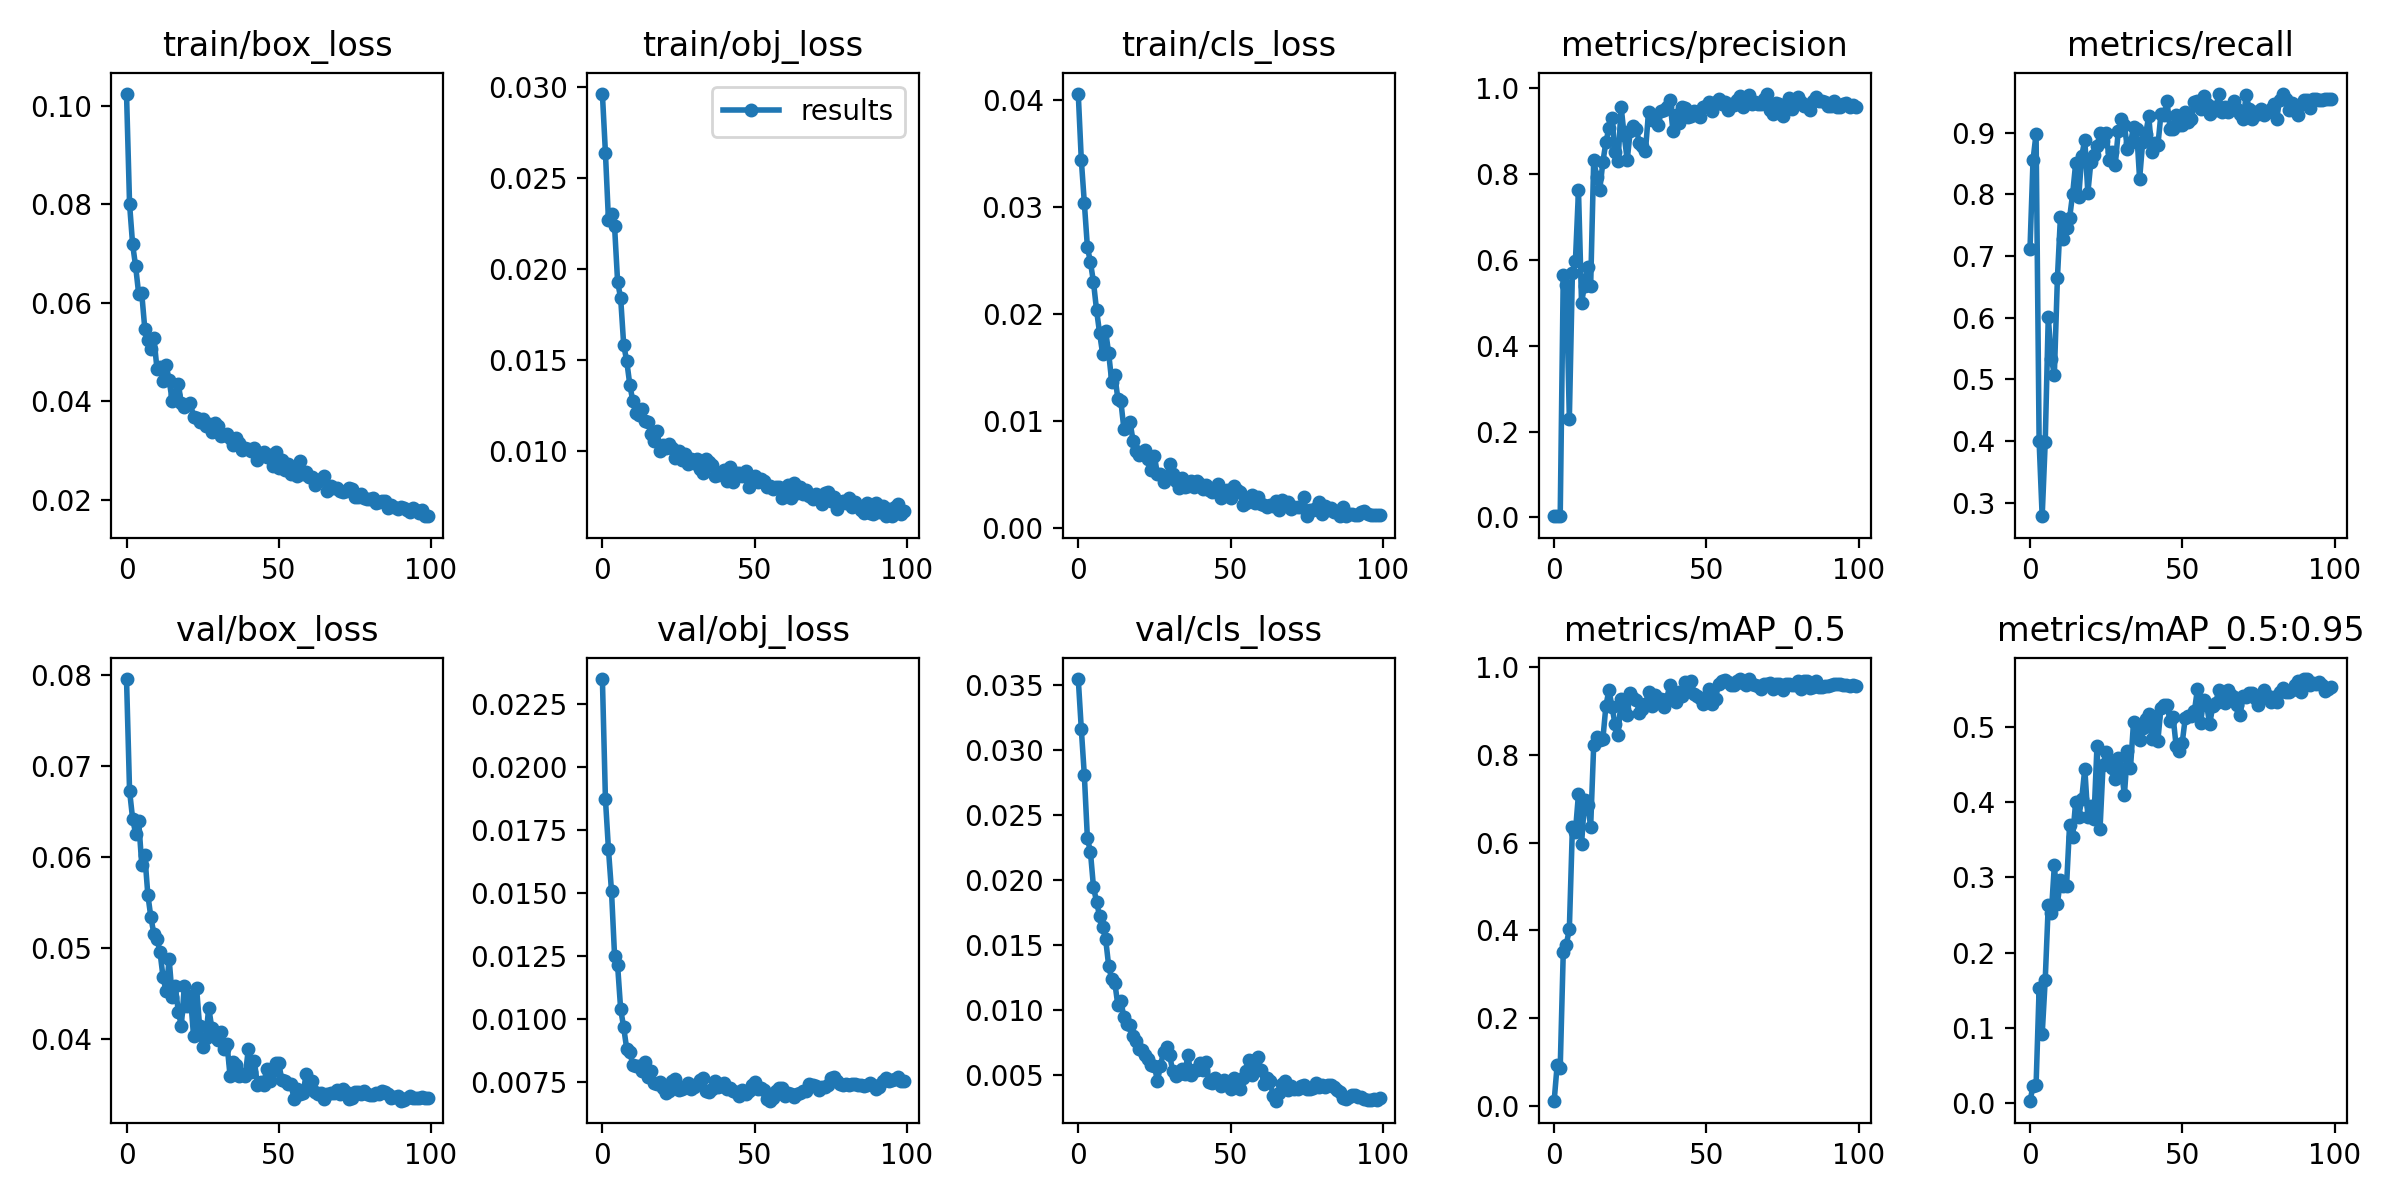

In [174]:
from IPython.display import Image
Image('/content/yolov5/runs/train/exp8/results.png')

# Loading Custom Model for tesing





Note: Everytime you train the custom model with different hyperparameters, the result and the new weights are going to be stored in "yolov5/runs/train/exp/". Now this "exp" keeps on iterating as per the run so make sure you enter the most updated "exp" path below to test the custom model on the latest or best weights.

In [175]:
custom_model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp8/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
INFO:yolov5:requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
INFO:yolov5:Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

INFO:yolov5:requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

INFO:yolov5:YOLOv5 🚀 2022-8-11 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

YOLOv5 🚀 2022-8-11 Pytho

In [176]:
import uuid   # Unique identifier
import os
import pandas as pd
import time

test_img_1 = os.path.join('/content/train_data3/images/test/00cc95c7-b8bf-411f-8477-f93e944f40ea.jpg')

In [177]:
test_1 = custom_model(test_img_1)
test_1.print()

image 1/1: 1920x1440 1 dislike
Speed: 80.4ms pre-process, 10.1ms inference, 1.4ms NMS per image at shape (1, 3, 640, 480)


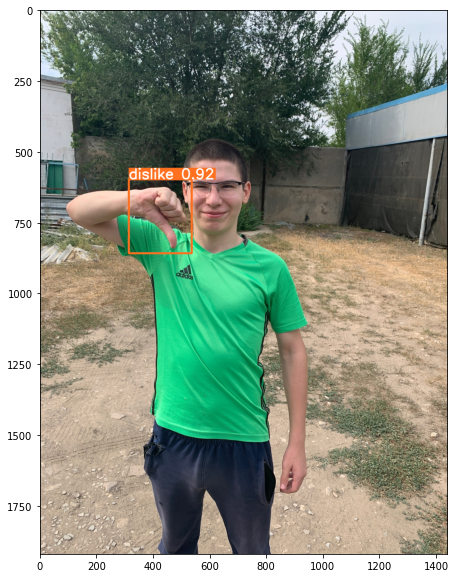

In [178]:
%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(np.squeeze(test_1.render()))
plt.show()

image 1/1: 1080x1920 1 ok
Speed: 79.4ms pre-process, 17.8ms inference, 12.2ms NMS per image at shape (1, 3, 384, 640)


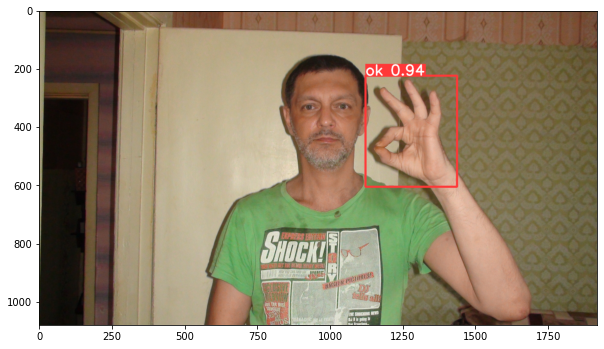

In [179]:
test_img_2 = os.path.join('/content/train_data3/images/test/0df146f0-4703-4258-af08-d3a3613977b0.jpg')

test_2 = custom_model(test_img_2)
test_2.print()

%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(np.squeeze(test_2.render()))
plt.show()

image 1/1: 1440x1920 1 peace
Speed: 70.6ms pre-process, 10.4ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)


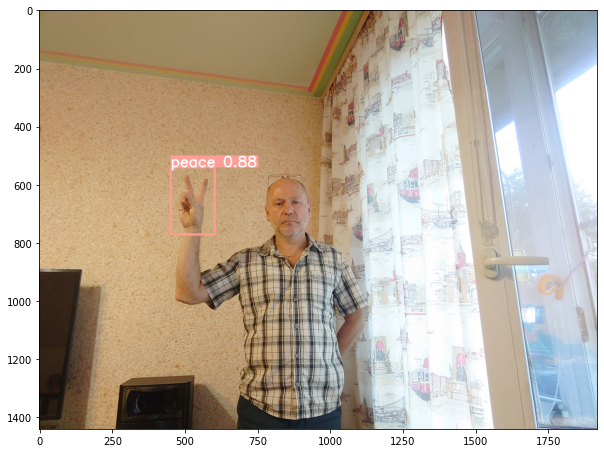

In [180]:
test_img_3 = os.path.join('/content/train_data3/images/test/0d534b44-abf5-45a8-b8a8-963c52377170.jpg')

test_3 = custom_model(test_img_3)
test_3.print()

%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(np.squeeze(test_3.render()))
plt.show()

# Testing Real Time Detections (Only work on windows)

In [189]:
cap = cv2.VideoCapture(0)  #try playing with 0, 1, or 2 if the camera doesnt pops up
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    test = custom_model(frame)
    
    cv2.imshow('Nabeel Custom Yolo', np.squeeze(test.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()